# Setup

In [1]:
%matplotlib inline
from pylab import *
import math

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties as decay
reload(decay)

<module 'decay_properties' from 'decay_properties.pyc'>

In [27]:
# example data input to class to determine effective area
theta_src = radians(30) #radians
phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
theta_view = radians(1) #degrees
N = 2000000 # number of samples
E_nu = 19.5 #log energy in eV of incident neutrino 
E_cut = 17

geom_area = geom_trap.Area(theta_src,h,R,theta_view, N)
A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot,A0,N0 = geom_area.event_retention()
print A_deg, len(phi_e)

1.6367564482567691 13958


In [28]:
# Assign to each event a tau energy, tau decay point, a decay probability, calculated view angle
# inputs : theta_src, ice, E_cut, e_dot, phi_e, t_e, rho, E_nu,h,R,view_cut, exit_angles
decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0)
                        

In [29]:
# ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_exit,\
# ret_view, ret_decay_angle, ret_fractions,ret_types, ret_p_exit = decay1.event_retention()

A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()

# print A_ret, len(ret_e_dot)
# print ret_exit_obs,ret_exit_decay, ret_decay_obs
print len(ret_e_dot)

0


## Adding RF cuts

In [ ]:
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1

In [133]:
import trigger_properties as RF
reload(RF)

<module 'trigger_properties' from 'trigger_properties.py'>

In [ ]:
trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, 
                                    ret_exit,ret_view, ret_decay_angle, ret_decay_alt,
                                    theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs,
                                    ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src,phi_src)

In [ ]:
trigger_result.RF_eff_area()

## Creation of Graphs with Successive Effective Area Refinement

In [134]:
phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
theta_view = radians(1) #degrees
N = 1000000 # number of samples
E_nu = 19 #log energy in eV of incident neutrino 
E_cut = 14
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1

In [135]:


# Creating a plot for the full range of possible source declinations 
start = 60 # minimum source declination in degrees
end = 70 # maximum source declination in degrees
steps=10 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

A_g = []
A_p=[]
A_rf = []
theta_view = radians(1)
for j in range(0,steps):
    
    theta_src = radians(start+(end-start)*float(j)/steps)
    print start+(end-start)*float(j)/steps
    # GEOMETRIC
    geom_area = geom_trap.Area(theta_src,phi_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    #print A_deg
    
    # DECAY
    decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, view_angle, A_deg, A0, N0)
    A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()
    #print A_ret
#     print "decay dist", mean(ret_exit_decay)
#     print "decay alt", mean(ret_decay_alt)
#     print "energy", mean(ret_tau_energy)
#     print "zenith", np.degrees(mean(ret_view)+theta_src)
#     print "view", np.degrees(mean(ret_view))
#     print "decay view", np.degrees(mean(ret_decay_angle))
    
    # TRIGGER
    trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, \
                                    ret_exit,ret_view, ret_decay_angle, ret_decay_alt, \
                                    theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                    ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src,phi_src, A0,N0)
    
    A_trigger  = trigger_result.RF_eff_area()
    #print A_trigger
    
    A_g.append(A_deg)
    A_p.append(A_ret)
    A_rf.append(A_trigger)
    print "   "




60.0
6.535038386744369e-07
   
61.0


KeyboardInterrupt: 

In [6]:
# Creating a plot for the full range of possible source declinations 
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

A_P_exit_energy = []
theta_view = radians(1)
for j in range(0,steps):
    print j
    theta_src = radians(start+(end-start)*float(j)/steps)
    # GEOMETRIC
    geom_area = geom_trap.Area(theta_src,phi_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, norm, e_dot = geom_area.event_retention()
    print A_deg
    
    # DECAY
    decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, norm,E_nu, h, R, theta_view, exit_angle, view_angle, A_deg)
    A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit = decay1.degree_eff_area()

    A_P_exit_energy.append(A_ret)


0


ValueError: too many values to unpack

0.0 194.32471284802563


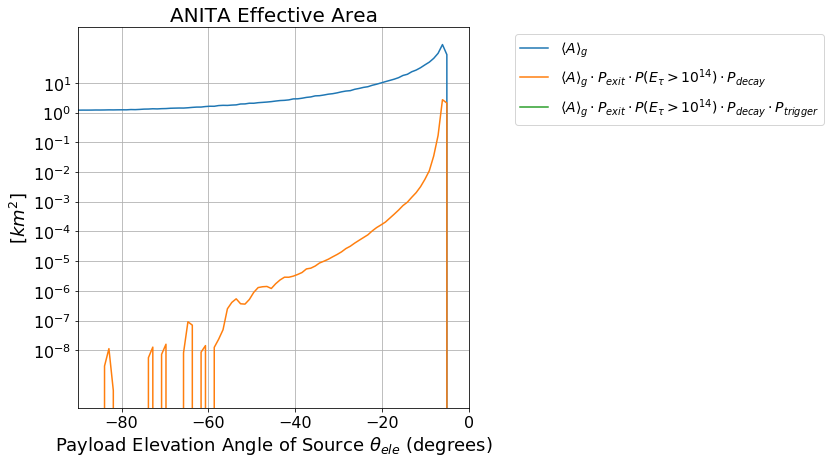

In [64]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')


ax.plot(x1, A_g)
ax.plot(x1, A_p)
ax.plot(x1, A_rf)


# ax.plot(x1, A_g)
# ax.plot(x1, A_P_exit)
# ax.plot(x1, A_P_exit_energy)
# ax.plot(x1, A_P_exit_energy_decay)
# ax.plot(x1, A_rf)
    
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend([r'$\langle A \rangle_g$', 
                    #r'$\langle A \rangle_g \cdot P_{exit}$', 
                    #r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14})$', 
                    r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14}) \cdot P_{decay}$',
                   r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14}) \cdot P_{decay} \cdot P_{trigger} $'],
                   fontsize=14, bbox_to_anchor=(1.1, 1))

plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$[km^2]$', fontsize=18)
plt.title("ANITA Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

y_min =min(A_g)
y_max = max(A_g)
print y_min, y_max
y_ticks = [10**x for x in range(int(round(math.log10(10**-8))),int(round(math.log10(y_max))))]
plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

In [ ]:
trigger_result.RF_eff_area()

In [48]:
data = np.load("anita_generic_parameterization.npz")
for item in data:
    print item
    print data[item]
    

parm_2d
[[[2.91006829e-04 8.22302649e-01 7.28022958e-01 2.02561809e-01
   1.00000000e-05 1.00000000e+00]
  [3.18730329e-04 8.27665252e-01 6.13529373e-01 2.15972963e-01
   9.99508669e-06 9.95446139e-01]
  [4.26980275e-04 6.90153212e-01 5.39794051e-01 2.07598989e-01
   9.99999050e-06 2.93412569e-01]
  [4.73786916e-04 7.76768182e-01 4.19140729e-01 2.18302969e-01
   9.99999998e-06 1.31079181e-01]
  [4.95584437e-04 9.68825393e-01 3.10620712e-01 2.23144618e-01
   1.00000000e-05 1.00000000e+00]
  [5.57544120e-04 9.64616652e-01 2.63108181e-01 2.21703595e-01
   9.99999537e-06 4.38891018e-02]
  [4.99094379e-04 8.68775973e-01 1.70313916e-01 2.20855367e-01
   6.98352972e-06 3.42299955e-01]
  [4.63551941e-04 8.66742820e-01 1.13638674e-01 2.16160283e-01
   9.91374567e-07 2.43621086e-02]
  [3.84634300e-04 7.04618531e-01 5.98548696e-02 2.14012630e-01
   2.54278765e-06 1.87767859e-01]
  [2.79144363e-04 7.19735307e-01 2.04179853e-03 1.97929261e-01
   3.38117347e-07 1.00000000e+00]]

 [[2.65065928e-04 7.

In [142]:
((8.0 *10**-6)*(3 * 10**(8)) / (300* 10**6))*np.sqrt((50 * 10)/(377*4*np.pi))


2.5989587230693698e-06